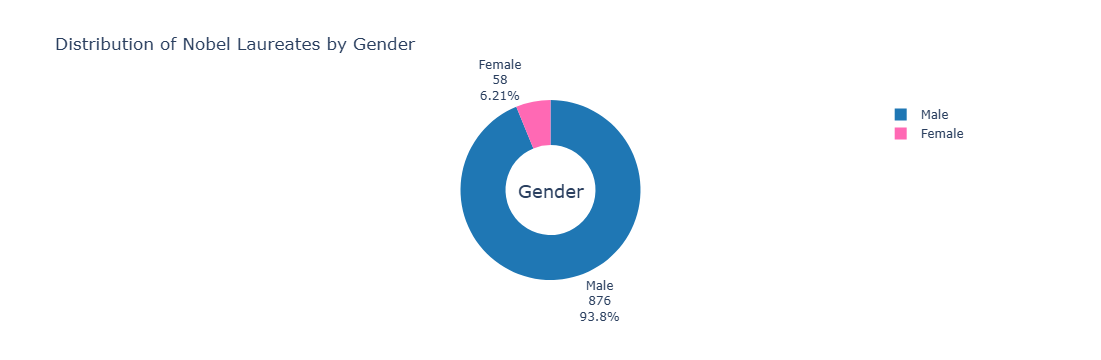

In [21]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv("D:\\nobel_prize_data.csv")


gender_counts = df['sex'].value_counts().loc[["Male", "Female"]]


fig = go.Figure(data=[go.Pie(
    labels=gender_counts.index,
    values=gender_counts.values,
    hole=0.5,
    marker=dict(colors=['#1f77b4', '#ff69b4']),
    textinfo='label+percent+value'
)])

fig.update_layout(
    title_text="Distribution of Nobel Laureates by Gender",
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=18, showarrow=False)],
    showlegend=True
)

fig.show()


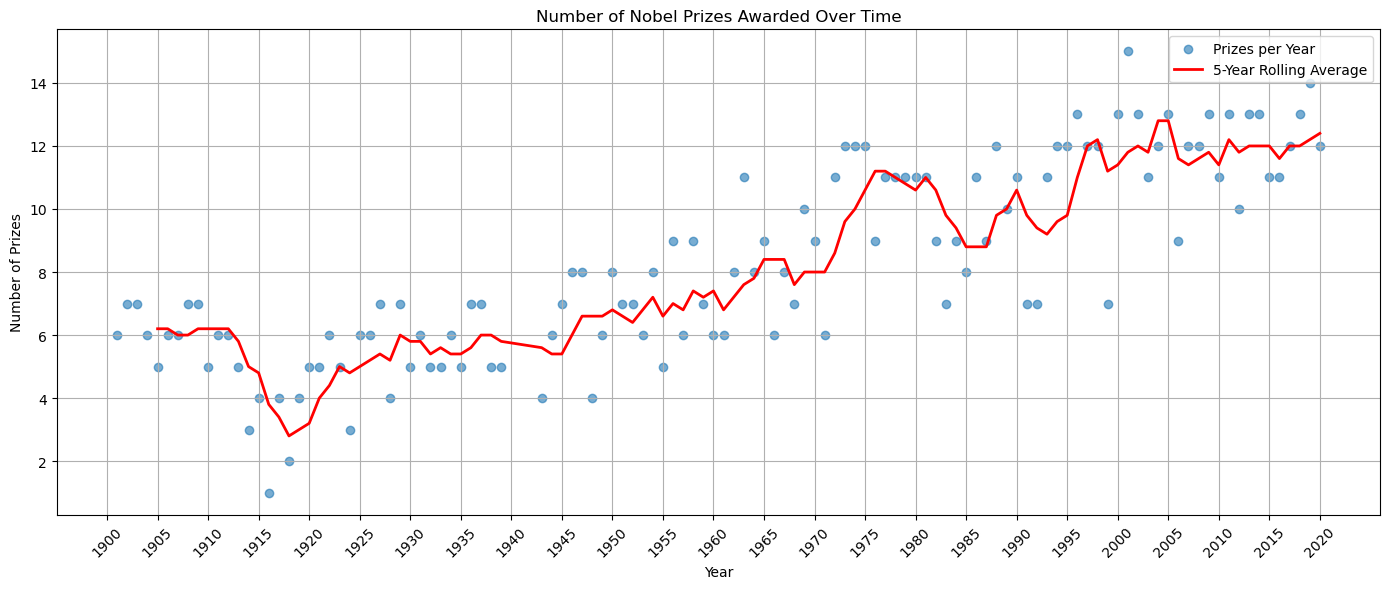

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("D:\\nobel_prize_data.csv")


prizes_per_year = df.groupby('year').count()['category']  # or any column


rolling_avg = prizes_per_year.rolling(window=5).mean()


plt.figure(figsize=(14, 6))


plt.scatter(prizes_per_year.index, prizes_per_year.values, alpha=0.6, label='Prizes per Year')


plt.plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=2, label='5-Year Rolling Average')


plt.xticks(ticks=np.arange(1900, 2025, 5), rotation=45)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Nobel Prizes Awarded Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


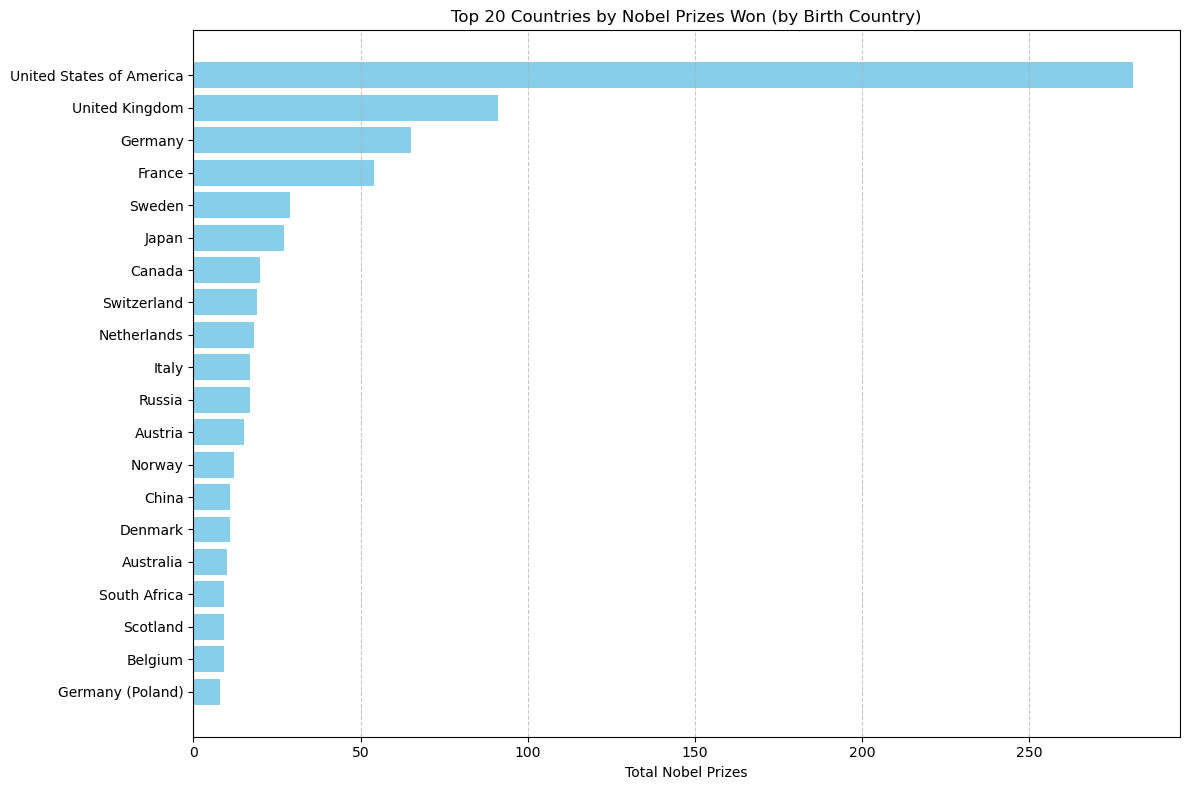

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("D:\\nobel_prize_data.csv")

# Count total number of prizes by birth country and select top 20
top20_countries = df['birth_country'].value_counts().head(20).reset_index()
top20_countries.columns = ['country', 'prize']


plt.figure(figsize=(12, 8))
plt.barh(top20_countries['country'][::-1], top20_countries['prize'][::-1], color='skyblue')
plt.xlabel('Total Nobel Prizes')
plt.title('Top 20 Countries by Nobel Prizes Won (by Birth Country)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Youngest Laureate:
full_name                 Malala Yousafzai
age_at_award                            17
prize           The Nobel Peace Prize 2014
Name: 885, dtype: object 

Oldest Laureate:
full_name                         John Goodenough
age_at_award                                   97
prize           The Nobel Prize in Chemistry 2019
Name: 937, dtype: object 

Average Age: 59.95
75% of laureates are younger than: 69 years



C:\Users\anubh\AppData\Local\Temp\ipykernel_6336\622813403.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



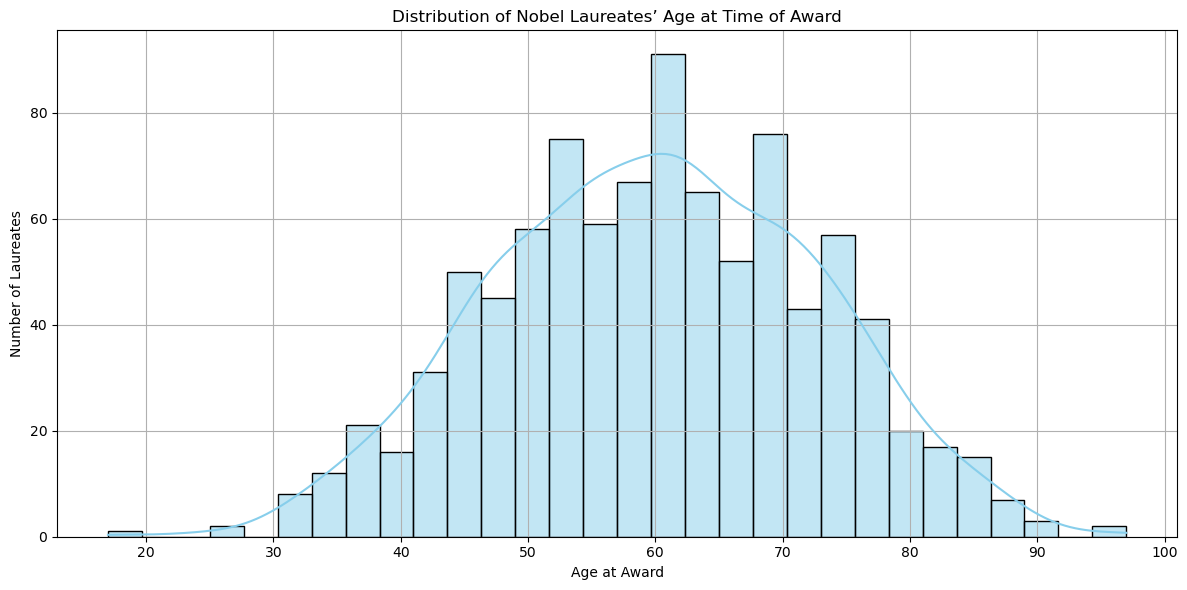

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv("D:\\nobel_prize_data.csv")


df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df_clean = df.dropna(subset=['birth_date'])


df_clean['age_at_award'] = df_clean['year'] - df_clean['birth_date'].dt.year


youngest = df_clean.loc[df_clean['age_at_award'].idxmin()]
oldest = df_clean.loc[df_clean['age_at_award'].idxmax()]


average_age = df_clean['age_at_award'].mean()
age_75_percentile = df_clean['age_at_award'].quantile(0.75)


print("Youngest Laureate:")
print(youngest[['full_name', 'age_at_award', 'prize']], "\n")

print("Oldest Laureate:")
print(oldest[['full_name', 'age_at_award', 'prize']], "\n")

print(f"Average Age: {average_age:.2f}")
print(f"75% of laureates are younger than: {age_75_percentile:.0f} years\n")

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['age_at_award'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Nobel Laureates’ Age at Time of Award')
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd


df = pd.read_csv("D:\\nobel_prize_data.csv")


country_counts = df['birth_country'].value_counts().reset_index()
country_counts.columns = ['country', 'prize']

# Find India's rank and total prizes
india_position = country_counts[country_counts['country'] == 'India'].index[0] + 1
india_total = country_counts[country_counts['country'] == 'India']['prize'].values[0]

print(f"India is ranked #{india_position} with a total of {india_total} Nobel Prizes.")


India is ranked #21 with a total of 8 Nobel Prizes.


C:\Users\anubh\AppData\Local\Temp\ipykernel_12240\2335638491.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=india_by_category, x='prize', y='category', palette='viridis')


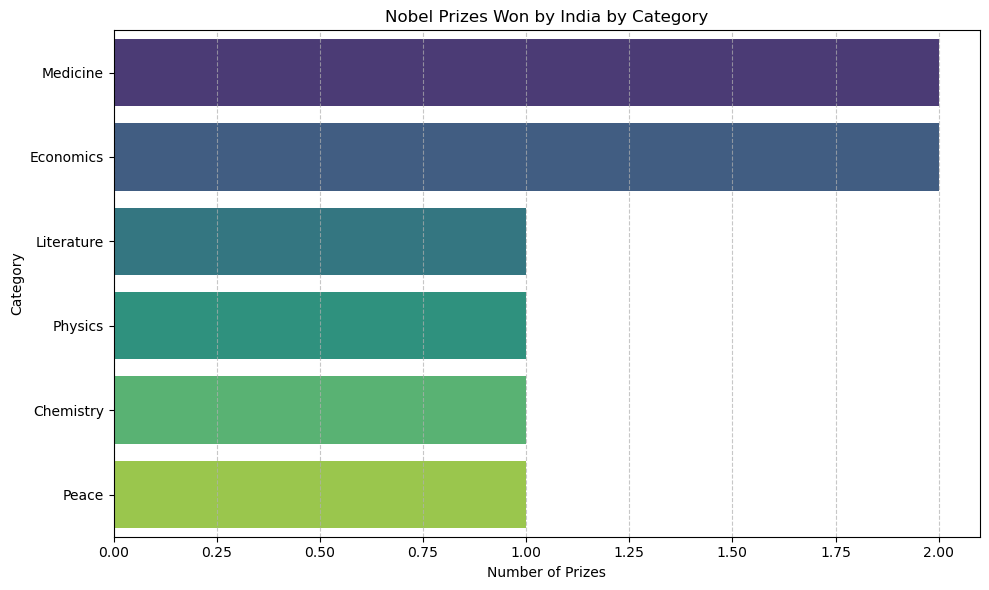

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("D:\\nobel_prize_data.csv")

india_data = df[df['birth_country'] == 'India']

# Count number of prizes by category
india_by_category = india_data['category'].value_counts().reset_index()
india_by_category.columns = ['category', 'prize']


plt.figure(figsize=(10, 6))
sns.barplot(data=india_by_category, x='prize', y='category', palette='viridis')
plt.title('Nobel Prizes Won by India by Category')
plt.xlabel('Number of Prizes')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
